# Playground - Part II

🎯 **Hedef**: ***Sinir Ağı hiperparametreleri*** hakkında daha iyi bir anlayış kazanmak

<hr>

👉  [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.06711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=false&regularizationRate_hide=false) tekrar açın. 

❗️ Algoritma stokastik olduğundan, sonuçların her çalıştırmada farklılık gösterebileceğini unutmayın. Bu nedenle, Sinir Ağlarınızın davranışını analiz etmek ve buna göre sonuçlarınızı çıkarmak için algoritmaları birden çok kez çalıştırmaktan çekinmeyin.

🕵🏻 Ders sırasında gördüğümüz farklı öğeleri inceleyelim:
- **Batch Size**
- **Regularization**
- **Learning Rate**

## (1) The batch size

❓ **İlk Soru** ❓ `circle dataset` (Sınıflandırma) seçin.

* Aşağıdakilerle bir model oluşturun:
* 3 nöronlu bir gizli katman,
* 0,03'e eşit bir a _learning rate_
* ve _tanh_ aktivasyon fonksiyonu

* Herhangi bir gürültü eklemeyin (=0).

* 30'luk bir batch size seçin

***Algoritmanın yakınsamasını inceleyin. Yavaş mı yoksa hızlı mı görünüyor?***

*Yavaş ama kararlı*

❓ **Soru: 1'lik batch size' da ne oluyor?** ❓

Şimdi, bu sinir ağını aynı veri kümesinde çalıştırın, ancak...

* batch-size 1 olsun.
* En az 150 dönem çalıştırdığınızdan emin olun.

***Eğitim ve test kaybı hakkında ne fark ettiniz? Bu istikrarsızlığın nedeni nedir?***

*Zikzaklar oldu ve istikrarlı değildi.*

❓ **Soru/Gözlem** ❓

Şimdi, tren kaybı ve test kaybı değerlerini okuyarak _batch_size_'ın etkisini görebilirsiniz: yinelemeleri duraklatın ve `“Adım”` düğmesini (play/stop düğmesinin sağ tarafında) kullanarak adım adım (yineleme başına yineleme) çalıştırın.

*Sürekli bir up&down durumu oluyor. train loss ve test loss artıp azalıyor.*

## 2. Regularization (Düzenleme)

❓ **Genelleme eksikliği hakkında soru** ❓ 

**Genelleme eksikliğini** bir kez daha gözlemlemek için:
* `“eXclusive OR”(XOR)` veri setini seçin, 
* gürültü seviyesi 50 olsun,
* 8 nöronlu iki gizli katman kullanın. 

***Modelinizi uyumlaştırmaya çalışın... Ne bekliyorsunuz?***

### *Kaos ve Ezberleme*

1) *Görsel Karmaşa: Model, XOR probleminin o basit, temiz çapraz yapısını öğrenmek yerine; turuncu bölgenin içindeki tek tük mavi noktaları veya tam tersini kapsamak için çok garip, karmaşık ve kıvrımlı şekiller (adacıklar) oluşturacaktır. Karar sınırları pürüzsüz değil, adeta bir harita kıyısı gibi girintili çıkıntılı olacaktır.*

2) *Gürültüyü Modellemek: Modeliniz o kadar güçlü (2 katman, 16 nöron) ve veri o kadar gürültülü ki (Noise 50), model "gerçeği" (XOR kuralını) değil, "hatayı" (rastgele gürültüyü) öğrenmeye çalışıyor.*

❗️ Daha küçük bir parti boyutu ile, modeliniz daha hızlı aşırı uyumlanacaktır... ❗️

👉 Bununla birlikte, bir sonraki soru için ***`batch size = 1`*** değerini koruyalım ve `düzenleme` (`regularization`) stratejisini kullanarak aşırı uyumlanmayı nasıl önleyebileceğimizi anlamaya çalışalım.

❓ **Düzenlemeyle (regularization) ilgili soru** ❓

Ağımızı ***avoid overfitting*** için ***düzenleyebilir miyiz***?

* Toplu işleme boyutunu 1 olarak tutun,
* Bir `L2-regularization` ekleyin,
* Karar sınırını düzeltene kadar bu L2 düzenlemesinin gücünü artırın!
Test kaybının artık dönemlerle birlikte artmadığını fark edin.

*Sınırlar sadeleşti ve gürültü yoksaymaya başladı*

❓ **Spiral veri setiyle ilgili sorular** ❓

<u>Yapılandırma</u>:

* `spiral` veri setini seç,
* Regularization’ı kaldır,
* `training/test` veri oranını %80 eğitim olacak şekilde artır.

<u>Sinir Ağı</u>: 3 gizli katman:
* 1. katmanda 8 nöron,
* 2. katmanda 7 nöron,
* 3. katmanda 6 nöron.

<u>Deney</u>:

* Algoritmayı batch size = 30 ile çalıştır,
* En az 1500 epoch çalıştırdığından emin ol,
* Sonra aynı deneyi batch size = 1 ile yapıp karşılaştır.

Train loss ve test loss değerlerinde adım adım ne olduğuna bakabilirsin.

*batch size = 30; Epoch 001,515 iken "Test loss 0.104 ve Training loss 0.047"*

*batch size = 1; Epoch 001,510 iken "Test loss 0.406 ve Training loss 0.340"*

## (3) The learning rate (Öğrenme oranı)

<u>`circle veri setine`</u> geri dön:

* Gürültü (noise) olmadan,
* Eğitim / test veri oranı %50 olacak şekilde,
* Batch size = 20 kullan.

<u>Sinir ağı</u> ayarları:
* 5 nöronlu tek bir katman,
* Regularization yok,
* `tanh` aktivasyon fonksiyonu.

❓ **Learning rate ile ilgili soru** ❓

Her bir learning rate değeri için (0.0001’den 10’a kadar):
* Algoritmayı 1000 epoch boyunca çalıştır,
* Test loss değerlerini aşağıdaki listeye kaydet,
* Ardından test loss değerlerini learning rate’e göre çiz (plot).

❗️ <u>Uyarı</u> ❗️  
Learning rate’i her değiştirdiğinde sinir ağını mutlaka **yeniden başlat**  
(_play/pause tuşunun solundaki circular arrow_).

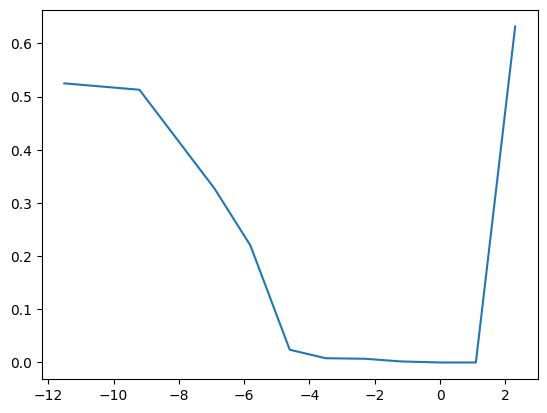

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

learning_rates = [0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3,  1.0, 3.0, 10.0]
test_loss = [0.525, 0.513, 0.327, 0.220, 0.024, 0.008, 0.007, 0.002, 0.000, 0.000, 0.632]


plt.plot(np.log(learning_rates), test_loss)

❗️ <u>Uyarı</u> ❗️  
Hem **çok düşük** hem de **çok yüksek** learning rate değerleri yüksek test loss’a yol açar… fakat **farklı nedenlerle**!

* **Düşük learning rate**:
  - Sinir ağının, orta seviyedeki bir learning rate’e benzer şekilde yakınsamasını sağlar
  - Ancak **çok daha yavaş** olur → yani **daha fazla epoch** gerekir

* **Yüksek learning rate**:
  - Algoritmanın tamamen **dağılmasına (diverge)** neden olur
  - Örneğin learning rate \( \alpha = 10 \) ve 400 epoch dene:
    - Loss değerinin sürekli değiştiğini görürsün
    - Bu durum, algoritmanın **farklı yerel minimumlara** yakınsadığını gösterir

🏁 Tebrikler!

💾 Not defterinizi `git add/commit/push` yapmayı unutmayın...